In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,precision_score, recall_score
from sklearn.decomposition import PCA

# Data Information

In [83]:
data_train=pd.read_excel("Data_Train.xlsx")
data_train.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [84]:
data_train.head(10)

Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4        BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
5              CCU → BLR    09:00         11:25   2h 25m    non-stop   
6        BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m      1 stop   
7        BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m      1 stop   
8        BLR → BOM → DEL    08:55  10:25 13 Mar  25h 30m      1 stop   
9        DEL → BOM → COK    11:25         19:15   7h 50m      1 stop   

               Additional_Info  Price  
0                      No info   3897  
1                      No info   7662  
2                      No info  13882  
3                      No info   6218  
4                      No info  13302  
5                      No info   3873  
6  In-flight meal not included  11087  
7                      No info  22270  
8  In-flight meal not included  11087  
9                      No info   8625

In [85]:
data_train.tail(10)

Airline Date_of_Journey    Source Destination  \
10673        Jet Airways      27/05/2019     Delhi      Cochin   
10674        Jet Airways      12/03/2019  Banglore   New Delhi   
10675          Air India       9/06/2019    Mumbai   Hyderabad   
10676  Multiple carriers       1/05/2019     Delhi      Cochin   
10677           SpiceJet      21/05/2019  Banglore       Delhi   
10678           Air Asia       9/04/2019   Kolkata    Banglore   
10679          Air India      27/04/2019   Kolkata    Banglore   
10680        Jet Airways      27/04/2019  Banglore       Delhi   
10681            Vistara      01/03/2019  Banglore   New Delhi   
10682          Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
10673  DEL → AMD → BOM → COK    13:25  04:25 28 May      15h     2 stops   
10674        BLR → BOM → DEL    20:35  21:20 13 Mar  24h 45m      1 stop   
10675              BOM → HYD    06:20         07:40   1h 20m    non-stop   
10676        DEL → BOM → COK    10:20         19:00   8h 40m      1 stop   
10677              BLR → DEL    05:55         08:35   2h 40m    non-stop   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

                    Additional_Info  Price  
10673                       No info  16704  
10674   In-flight meal not included  11087  
10675                       No info   3100  
10676                       No info   9794  
10677  No check-in baggage included   3257  
10678                       No info   4107  
10679                       No info   4145  
10680                       No info   7229  
10681                       No info  12648  
10682                       No info  11753

In [86]:
data_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [87]:
data_train.shape

(10683, 11)

In [88]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Data has object and Interger values

In [89]:
data_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
13h 35m      1
33h 20m      1
28h 30m      1
27h 30m      1
35h 20m      1
Name: Duration, Length: 368, dtype: int64

In [90]:
data_train["Price"].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64

In [91]:
data_train.dropna(inplace = True)

In [92]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Data has No null values

# List of Categorical & Numerical columns

In [93]:
numCol=[]
catCol=[]

for col in data_train.columns:
    if data_train[col].dtype=='O':
        catCol.append(col)
    else:
            numCol.append(col)

In [94]:
print("List of categorical columns:",catCol)
print("List of numerical columns:",numCol)

List of categorical columns: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
List of numerical columns: ['Price']


# Missing Value Analysis of Dataset

In [95]:
data_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [96]:
data_train[data_train.isna().sum(axis=1)>1]

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []

No missing or Null values found in this data sets

# Check Duplicate,Repeated and Unknown values

In [97]:
data_train[data_train.duplicated()]

Airline Date_of_Journey    Source Destination  \
683    Jet Airways       1/06/2019     Delhi      Cochin   
1061     Air India      21/05/2019     Delhi      Cochin   
1348     Air India      18/05/2019     Delhi      Cochin   
1418   Jet Airways       6/06/2019     Delhi      Cochin   
1674        IndiGo      24/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10594  Jet Airways      27/06/2019     Delhi      Cochin   
10616  Jet Airways       1/06/2019     Delhi      Cochin   
10634  Jet Airways       6/06/2019     Delhi      Cochin   
10672  Jet Airways      27/06/2019     Delhi      Cochin   
10673  Jet Airways      27/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
683    DEL → NAG → BOM → COK    14:35  04:25 02 Jun  13h 50m     2 stops   
1061   DEL → GOI → BOM → COK    22:00  19:15 22 May  21h 15m     2 stops   
1348   DEL → HYD → BOM → COK    17:15  19:15 19 May      26h     2 stops   
1418   DEL → JAI → BOM → COK    05:30  04:25 07 Jun  22h 55m     2 stops   
1674               BLR → DEL    18:25         21:20   2h 55m    non-stop   
...                      ...      ...           ...      ...         ...   
10594  DEL → AMD → BOM → COK    23:05  12:35 28 Jun  13h 30m     2 stops   
10616  DEL → JAI → BOM → COK    09:40  12:35 02 Jun  26h 55m     2 stops   
10634  DEL → JAI → BOM → COK    09:40  12:35 07 Jun  26h 55m     2 stops   
10672  DEL → AMD → BOM → COK    23:05  19:00 28 Jun  19h 55m     2 stops   
10673  DEL → AMD → BOM → COK    13:25  04:25 28 May      15h     2 stops   

                   Additional_Info  Price  
683                        No info  13376  
1061                       No info  10231  
1348                       No info  12392  
1418   In-flight meal not included  10368  
1674                       No info   7303  
...                            ...    ...  
10594                      No info  12819  
10616                      No info  13014  
10634  In-flight meal not included  11733  
10672  In-flight meal not included  11150  
10673                      No info  16704  

[220 rows x 11 columns]

Data has duplicate values in various rows and columns

In [99]:
for i in numCol:
    print(i,"---%Null", (data_train[i].shape[0]-data_train[i].notnull().sum()) / data_train[i].shape[0]*100)
    print(data_train[i].value_counts())
    print("\n")

Price ---%Null 0.0
10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64




# Descriptive Statistics

In [100]:
data_train.describe(include='all')

Airline Date_of_Journey Source Destination            Route  \
count         10682           10682  10682       10682            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4536        4536             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count     10682        10682    10682       10682           10682   
unique      222         1343      368           5              10   
top       18:55        19:00   2h 50m      1 stop         No info   
freq        233          423      550        5625            8344   
mean        NaN          NaN      NaN         NaN             NaN   
std         NaN          NaN      NaN         NaN             NaN   
min         NaN          NaN      NaN         NaN             NaN   
25%         NaN          NaN      NaN         NaN             NaN   
50%         NaN          NaN      NaN         NaN             NaN   
75%         NaN          NaN      NaN         NaN             NaN   
max         NaN          NaN      NaN         NaN             NaN   

               Price  
count   10682.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     9087.214567  
std      4611.548810  
min      1759.000000  
25%      5277.000000  
50%      8372.000000  
75%     12373.000000  
max     79512.000000

In [101]:
data_train[numCol].describe

<bound method NDFrame.describe of        Price
0       3897
1       7662
2      13882
3       6218
4      13302
...      ...
10678   4107
10679   4145
10680   7229
10681  12648
10682  11753

[10682 rows x 1 columns]>

In [102]:
data_train[catCol].describe

<bound method NDFrame.describe of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO 

In [103]:
data_train[catCol].describe().T

count unique              top  freq
Airline          10682     12      Jet Airways  3849
Date_of_Journey  10682     44       18/05/2019   504
Source           10682      5            Delhi  4536
Destination      10682      6           Cochin  4536
Route            10682    128  DEL → BOM → COK  2376
Dep_Time         10682    222            18:55   233
Arrival_Time     10682   1343            19:00   423
Duration         10682    368           2h 50m   550
Total_Stops      10682      5           1 stop  5625
Additional_Info  10682     10          No info  8344

# Univariate Analysis

In [104]:
for i in catCol:
    print(i)
    print(data_train[i].nunique())
    print(data_train[i].value_counts())
    print("\n")

Airline
12
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Date_of_Journey
44
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/0

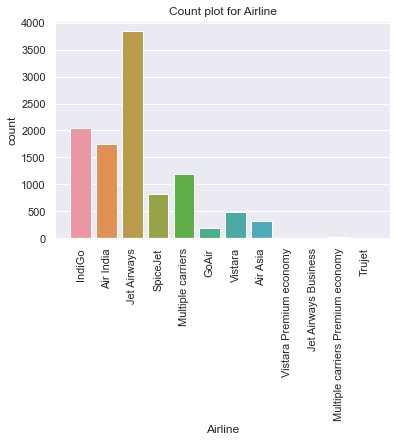

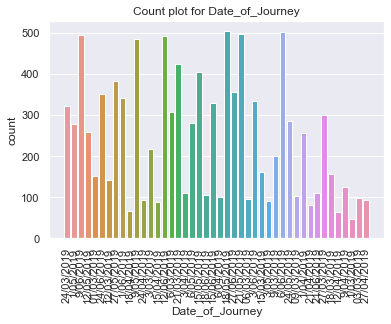

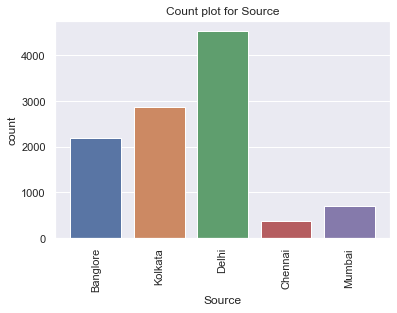

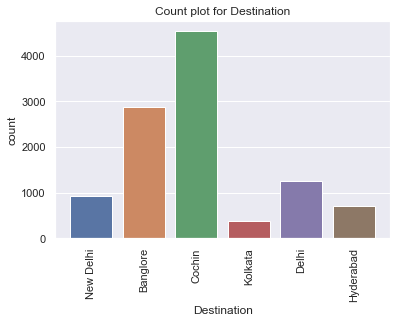

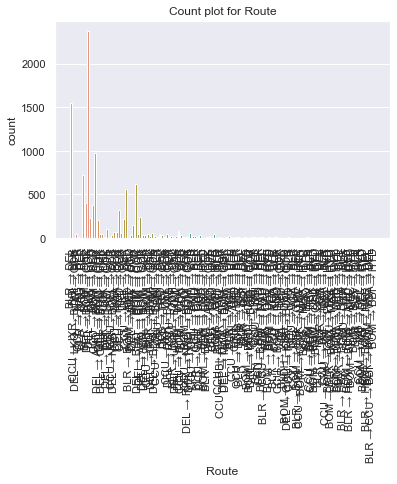

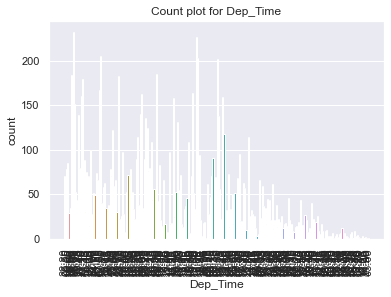

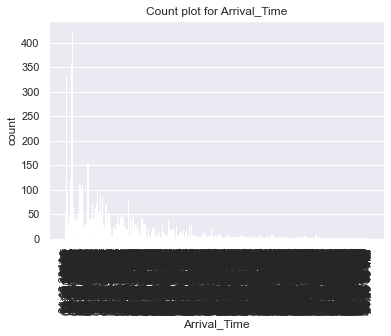

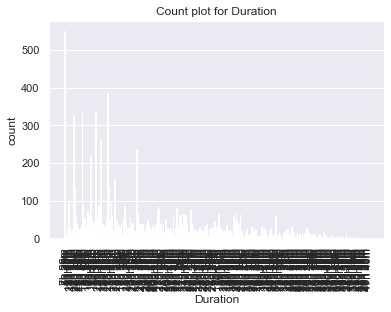

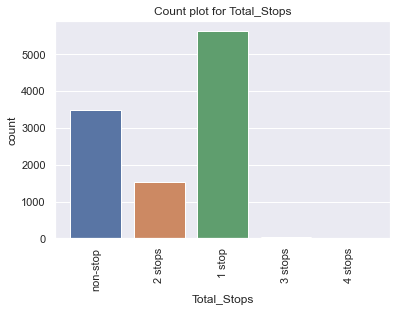

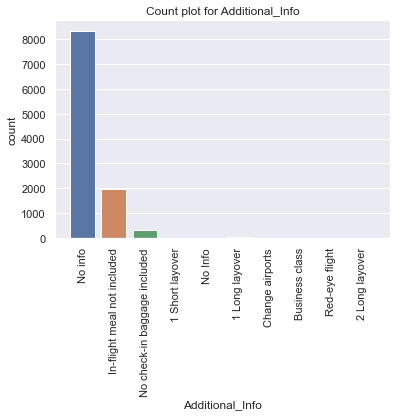

In [105]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(data_train[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for {i}")
    plt.plot()
    plt.show()

<Figure size 432x288 with 0 Axes>

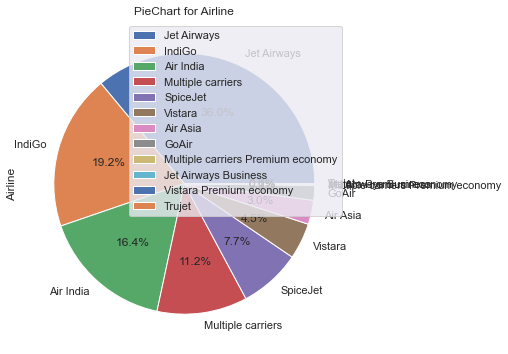

<Figure size 432x288 with 0 Axes>

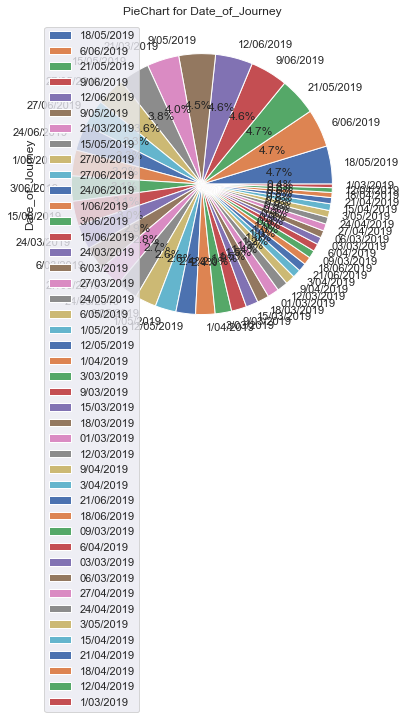

<Figure size 432x288 with 0 Axes>

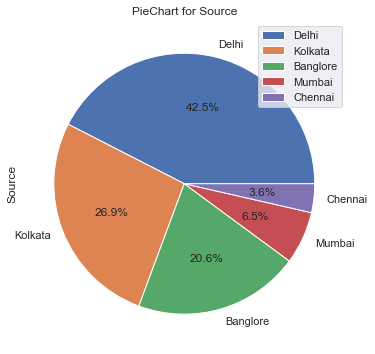

<Figure size 432x288 with 0 Axes>

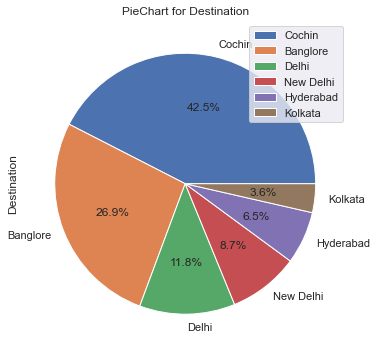

<Figure size 432x288 with 0 Axes>

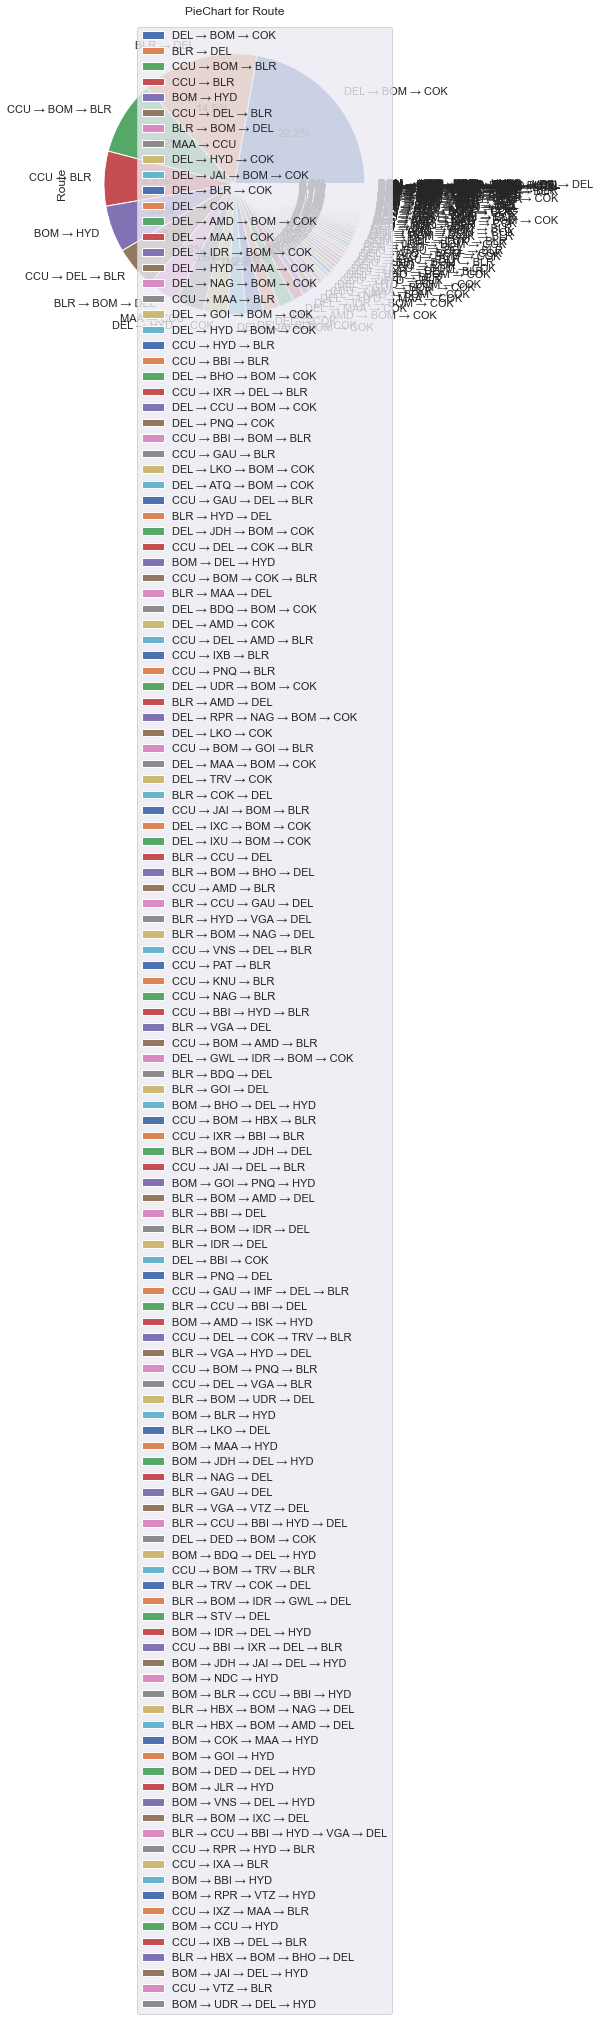

<Figure size 432x288 with 0 Axes>

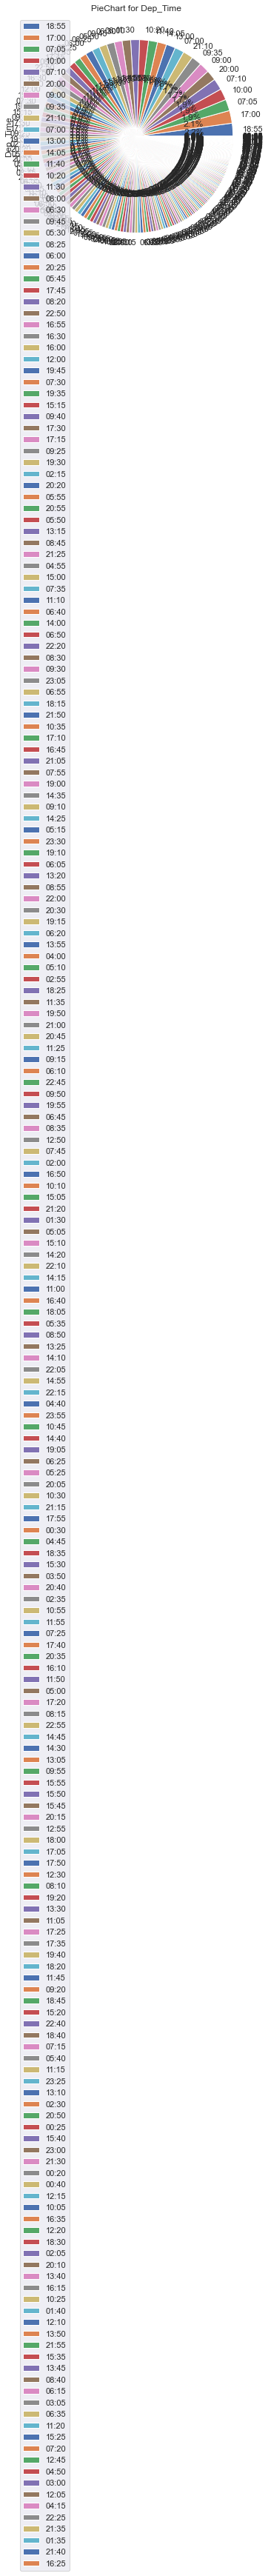

<Figure size 432x288 with 0 Axes>

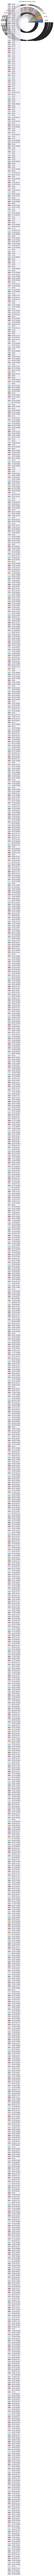

<Figure size 432x288 with 0 Axes>

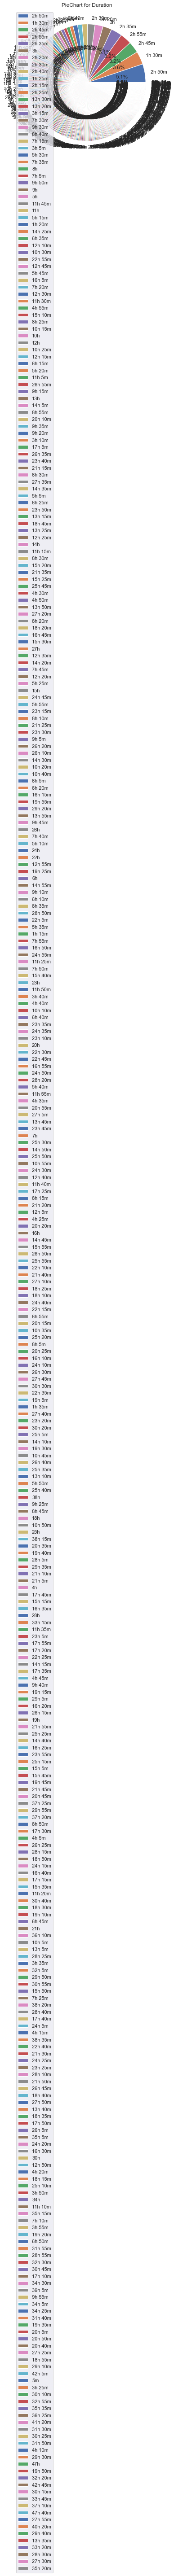

<Figure size 432x288 with 0 Axes>

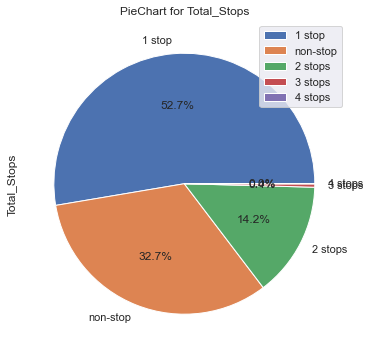

<Figure size 432x288 with 0 Axes>

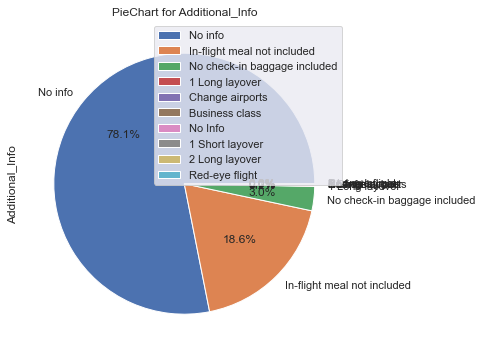

In [106]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    countsDF= pd.DataFrame(data_train[i].value_counts())
    plot= countsDF.plot.pie(subplots=True,autopct="%.1f%%",figsize=(11,6))
    plt.title(f"PieChart for {i}")
    plt.plot()
    plt.show()

In [107]:
for i in numCol:
    print(i)
    print(data_train[i].nunique())
    print(data_train[i].value_counts())
    print("\n")

Price
1870
10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64




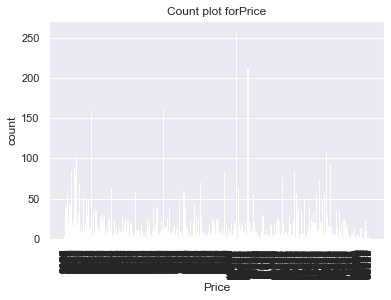

In [108]:
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(data_train[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for{i}")
    plt.plot()
    plt.show()

Price


<Figure size 432x288 with 0 Axes>

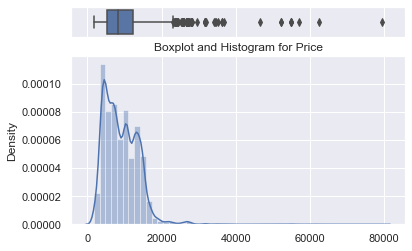

In [109]:
for i in numCol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x = data_train[i],ax=ax_box)
    #sns.histplot (data=df, x=i, ax=ax_hist)
    sns.distplot(x= data_train[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Boxplot and Histogram for {i}")
    plt.show()

In [110]:
pd.DataFrame(data_train.skew(axis=0,skipna=True))

0
Price  1.812405

# Multivariate Analysis

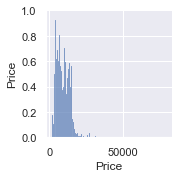

In [111]:
sns.pairplot(data_train)
plt.plot()
plt.show()

# Exploratory Data Analysis(EDA)

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [112]:
data_train["Journey_day"] = pd.to_datetime(data_train.Date_of_Journey, format="%d/%m/%Y").dt.day

In [113]:
data_train["Journey_month"] = pd.to_datetime(data_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [114]:
data_train.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  
0           24              3  
1            1              5  
2            9              6  
3           12              5  
4            1              3

In [115]:
data_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.


In [116]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
data_train["Dep_hour"] = pd.to_datetime(data_train["Dep_Time"]).dt.hour

# Extracting Minutes
data_train["Dep_min"] = pd.to_datetime(data_train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
data_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [117]:
data_train.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   
3   5h 25m      1 stop         No info   6218           12              5   
4   4h 45m      1 stop         No info  13302            1              3   

   Dep_hour  Dep_min  
0        22       20  
1         5       50  
2         9       25  
3        18        5  
4        16       50

In [118]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [119]:
data_train["Duration_hours"] = duration_hours
data_train["Duration_mins"] = duration_mins

In [120]:
data_train.drop(["Duration"], axis = 1, inplace = True)

In [121]:
data_train.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   
3      1 stop         No info   6218           12              5        18   
4      1 stop         No info  13302            1              3        16   

   Dep_min  Duration_hours  Duration_mins  
0       20               2             50  
1       50               7             25  
2       25              19              0  
3        5               5             25  
4       50               4             45

# Handling Categorical Data

In [122]:
data_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

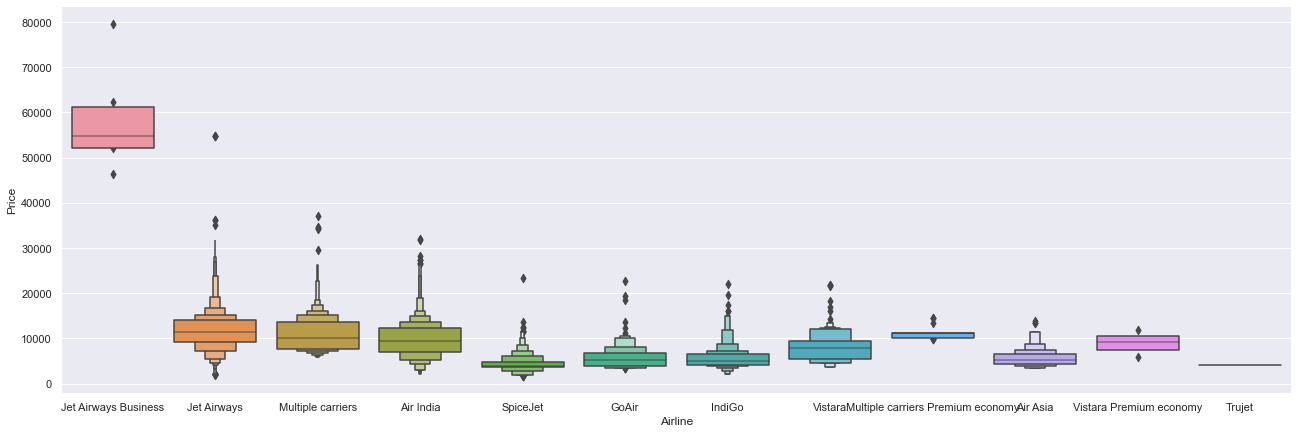

In [123]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [124]:
Airline = data_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

In [125]:
data_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

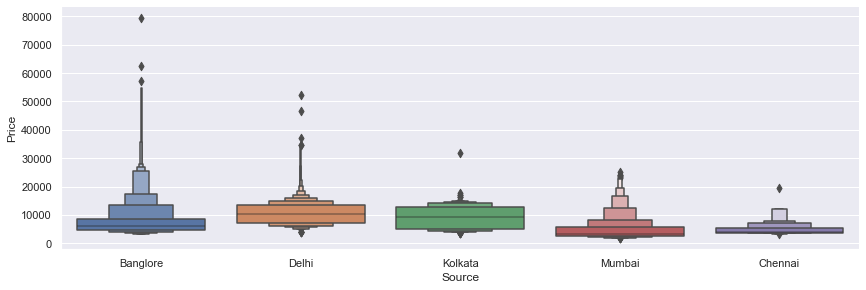

In [126]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = data_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [127]:
Source = data_train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

In [128]:
data_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [129]:
Destination = data_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [130]:
data_train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [131]:
data_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [132]:
data_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [133]:
data_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [134]:
data_train.head()

Airline    Source Destination  Arrival_Time  Total_Stops  Price  \
0       IndiGo  Banglore   New Delhi  01:10 22 Mar            0   3897   
1    Air India   Kolkata    Banglore         13:15            2   7662   
2  Jet Airways     Delhi      Cochin  04:25 10 Jun            2  13882   
3       IndiGo   Kolkata    Banglore         23:30            1   6218   
4       IndiGo  Banglore   New Delhi         21:35            1  13302   

   Journey_day  Journey_month  Dep_hour  Dep_min  Duration_hours  \
0           24              3        22       20               2   
1            1              5         5       50               7   
2            9              6         9       25              19   
3           12              5        18        5               5   
4            1              3        16       50               4   

   Duration_mins  
0             50  
1             25  
2              0  
3             25  
4             45

In [135]:
data_train = pd.concat([data_train, Airline, Source, Destination], axis = 1)

In [136]:
data_train.head()

Airline    Source Destination  Arrival_Time  Total_Stops  Price  \
0       IndiGo  Banglore   New Delhi  01:10 22 Mar            0   3897   
1    Air India   Kolkata    Banglore         13:15            2   7662   
2  Jet Airways     Delhi      Cochin  04:25 10 Jun            2  13882   
3       IndiGo   Kolkata    Banglore         23:30            1   6218   
4       IndiGo  Banglore   New Delhi         21:35            1  13302   

   Journey_day  Journey_month  Dep_hour  Dep_min  ...  \
0           24              3        22       20  ...   
1            1              5         5       50  ...   
2            9              6         9       25  ...   
3           12              5        18        5  ...   
4            1              3        16       50  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 32 columns]

In [137]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [138]:
data_train.head()

Arrival_Time  Total_Stops  Price  Journey_day  Journey_month  Dep_hour  \
0  01:10 22 Mar            0   3897           24              3        22   
1         13:15            2   7662            1              5         5   
2  04:25 10 Jun            2  13882            9              6         9   
3         23:30            1   6218           12              5        18   
4         21:35            1  13302            1              3        16   

   Dep_min  Duration_hours  Duration_mins  Airline_Air India  ...  \
0       20               2             50                  0  ...   
1       50               7             25                  1  ...   
2       25              19              0                  0  ...   
3        5               5             25                  0  ...   
4       50               4             45                  0  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 29 columns]

In [139]:
data_train.shape

(10682, 29)

# Heatmap of Dataset

<AxesSubplot:>

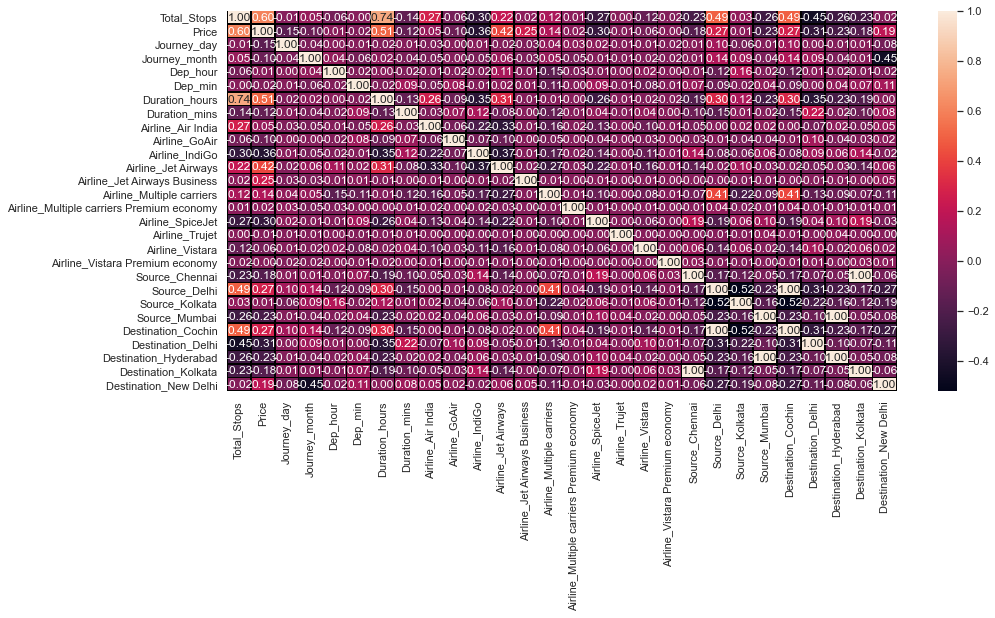

In [140]:
plt.figure(figsize=(15,7))
sns.heatmap(data_train.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

# Test Set

In [141]:
data_test= pd.read_excel("Test_set.xlsx")
data_test.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [142]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(data_test.info())

print()
print()

print("Null values :")
print("-"*75)
df.dropna(inplace = True)
print(data_test.isnull().sum())

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [146]:
# EDA

# Date_of_Journey
data_test["Journey_day"] = pd.to_datetime(data_test.Date_of_Journey, format="%d/%m/%Y").dt.day
data_test["Journey_month"] = pd.to_datetime(data_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [147]:
# Dep_Time
data_test["Dep_hour"] = pd.to_datetime(data_test["Dep_Time"]).dt.hour
data_test["Dep_min"] = pd.to_datetime(data_test["Dep_Time"]).dt.minute
data_test.drop(["Dep_Time"], axis = 1, inplace = True)


In [148]:
# Arrival_Time
data_test["Arrival_hour"] = pd.to_datetime(data_test.Arrival_Time).dt.hour
data_test["Arrival_min"] = pd.to_datetime(data_test.Arrival_Time).dt.minute
data_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [149]:
# Duration
duration = list(data_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [150]:
# Adding Duration column to test set
data_test["Duration_hours"] = duration_hours
data_test["Duration_mins"] = duration_mins
data_test.drop(["Duration"], axis = 1, inplace = True)


In [151]:
# Categorical data

print("Airline")
print("-"*75)
print(data_test["Airline"].value_counts())
Airline = pd.get_dummies(df["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(data_test["Source"].value_counts())
Source = pd.get_dummies(data_test["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(data_test["Destination"].value_counts())
Destination = pd.get_dummies(data_test["Destination"], drop_first = True)


Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [152]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
data_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
data_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([data_test, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Shape of test data :  (2671, 28)


In [153]:
data_test.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            1            6              6        17       30             4   
1            1           12              5         6       20            10   
2            1           21              5        19       15            19   
3            1           21              5         8        0            21   
4            0           24              6        23       55             2   

   Arrival_min  Duration_hours  Duration_mins  Air India  ...  \
0           25              10             55          0  ...   
1           20               4              0          0  ...   
2            0              23             45          0  ...   
3            0              13              0          0  ...   
4           45               2             50          0  ...   

   Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
0                        0        0      1        0       0       1      0   
1                        0        0      0        1       0       0      0   
2                        0        0      1        0       0       1      0   
3                        0        0      1        0       0       1      0   
4                        0        0      0        0       0       0      1   

   Hyderabad  Kolkata  New Delhi  
0          0        0          0  
1          0        0          0  
2          0        0          0  
3          0        0          0  
4          0        0          0  

[5 rows x 28 columns]

# Feature Selection

In [154]:
data_train.shape

(10682, 29)

In [155]:
data_train.columns

Index(['Arrival_Time', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [160]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min',  'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Duration_hours  \
0            0           24              3        22       20               2   
1            2            1              5         5       50               7   
2            2            9              6         9       25              19   
3            1           12              5        18        5               5   
4            1            1              3        16       50               4   

   Duration_mins  Airline_Air India  Airline_GoAir  Airline_IndiGo  ...  \
0             50                  0              0               1  ...   
1             25                  1              0               0  ...   
2              0                  0              0               0  ...   
3             25                  0              0               1  ...   
4             45                  0              0               1  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 27 columns]

In [161]:
y = data_train.iloc[:, 1]
y.head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int64

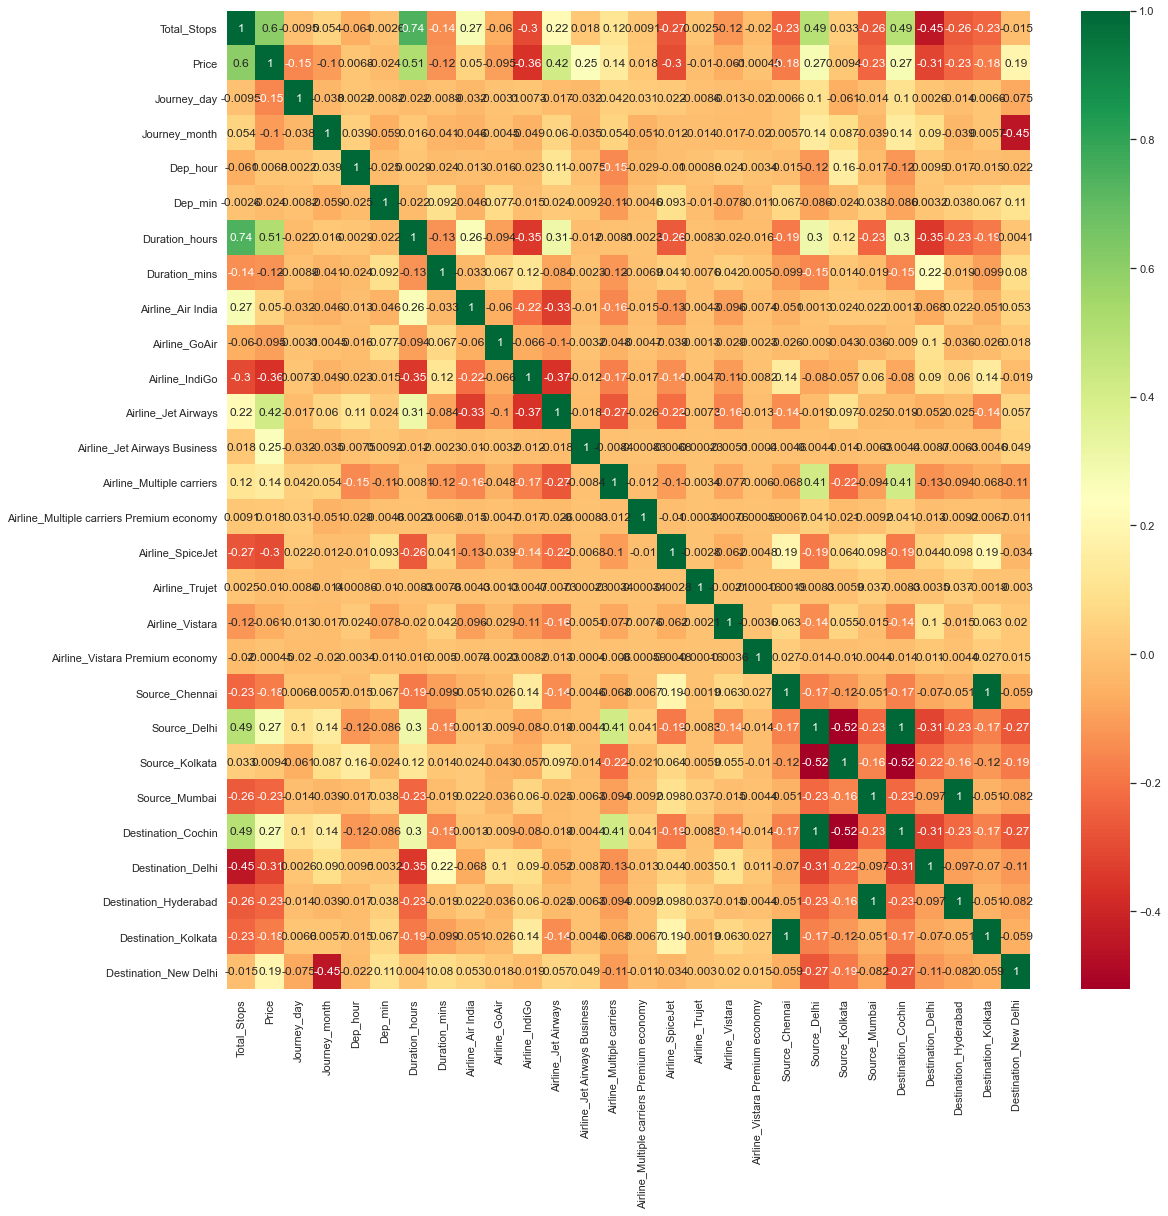

In [163]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [166]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [165]:
print(selection.feature_importances_)

[6.92038189e-01 0.00000000e+00 4.15040579e-04 1.21878683e-04
 4.98604913e-05 1.59233486e-01 3.84680566e-04 2.10665849e-02
 0.00000000e+00 0.00000000e+00 2.80432167e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.05265639e-06
 2.58131962e-04 0.00000000e+00 0.00000000e+00 5.99591311e-02
 1.55179460e-02 0.00000000e+00 4.37836385e-02 1.33491051e-03
 0.00000000e+00 0.00000000e+00 3.03014725e-03]


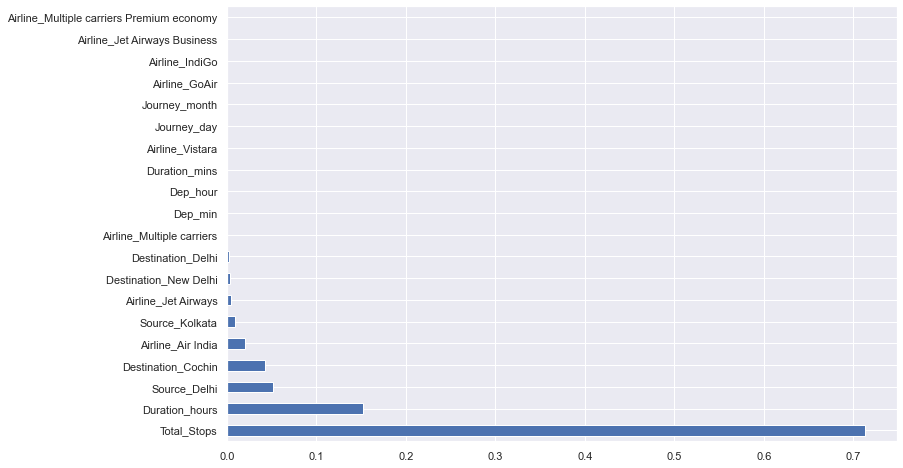

In [167]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [169]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [170]:
y_pred = reg_rf.predict(X_test)

In [171]:
reg_rf.score(X_train, y_train)

0.9999545989987327

In [172]:
reg_rf.score(X_test, y_test)

0.9999997949881952